In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
products = pd.read_csv('../data/products.tsv', delimiter='\t', index_col='id')
products.shape[0]

552104

In [4]:
products.drop_duplicates(inplace=True)
products.shape[0]

548552

In [8]:
products.sample(5)

,asin,discontinued,group_name,title,categories,salesrank,similars_count,avg_rating,total_reviews,downloaded_reviews
id,,,,,,,,,,
443459,B00006IGT9,False,Music,Jethro Tull - 36 All-Time Greatest Hits,"[67204, 301668, 40, 292809, 408264, 5174, 408254]",145085.0,4.0,5.0,1.0,1.0
147992,0743213939,False,Book,Kaplan Sat and Psat 2002 (Kaplan Sat & Psat),"[1000, 11628, 283155, 11668, 21, 11670]",1095834.0,0.0,4.5,12.0,12.0
128345,B00000ILEE,False,DVD,Waiting to Exhale,"[426368, 130, 452740, 408328, 433290, 434574, ...",8338.0,5.0,4.0,39.0,39.0
403922,0531153428,False,Book,Across America: The Story of Lewis & Clark,"[2947, 4, 2917, 2948, 14631, 1000, 75, 2925, 1...",722100.0,0.0,0.0,0.0,0.0
309664,1558672648,False,Book,Convection Oven Cookery (Nitty Gritty Cookbook...,"[4256, 6, 4262, 1000, 4233, 4264, 4272, 283155]",395043.0,5.0,1.0,1.0,1.0


<Axes: ylabel='count'>

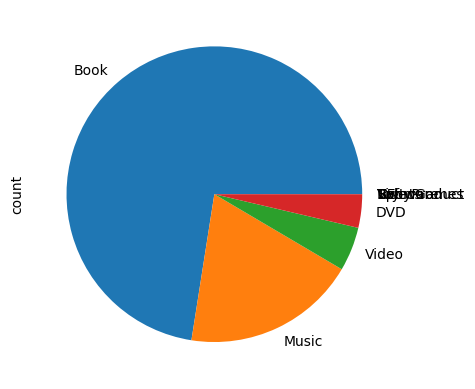

In [15]:
products['group_name'].value_counts().plot(kind='pie')

<Axes: ylabel='group_name'>

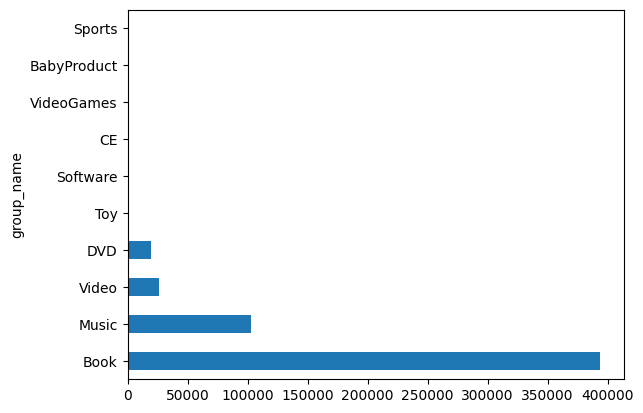

In [7]:
products['group_name'].value_counts().plot(kind='barh')

In [10]:
import numpy as np

In [13]:
products['salesrank'] = products['salesrank'].apply(lambda x: np.nan if x in (-1, 0) else x)

In [17]:
products.groupby('group_name')[['salesrank', 'avg_rating', 'downloaded_reviews']].agg(['min', 'max', 'mean', 'median'])

salesrank                                     avg_rating       \
                  min        max           mean    median        min  max   
group_name                                                                  
BabyProduct    1017.0     1017.0    1017.000000    1017.0        4.5  4.5   
Book             19.0  3798351.0  631558.400282  467838.0        0.0  5.0   
CE            39367.0    84976.0   66277.500000   70383.5        0.0  4.0   
DVD              28.0    71583.0   25405.708722   23569.0        0.0  5.0   
Music            27.0   671027.0  154431.629558  116138.5        0.0  5.0   
Software        200.0     3828.0    2016.200000    1955.0        3.5  5.0   
Sports         4684.0     4684.0    4684.000000    4684.0        4.0  4.0   
Toy              59.0    45241.0   12921.375000    5932.5        0.0  5.0   
Video             1.0   130076.0   31717.146586   25528.5        0.0  5.0   
VideoGames      339.0      339.0     339.000000     339.0        2.5  2.5   

                             downloaded_reviews                            
                 mean median                min     max       mean median  
group_name                                                                 
BabyProduct  4.500000    4.5                3.0     3.0   3.000000    3.0  
Book         3.051148    4.0                0.0  4995.0  11.666052    2.0  
CE           1.750000    1.5                0.0     4.0   1.250000    0.5  
DVD          3.670996    4.0                0.0  3515.0  41.027184   10.0  
Music        3.635529    4.5                0.0  3815.0  13.461665    3.0  
Software     4.500000    5.0                1.0     5.0   2.600000    2.0  
Sports       4.000000    4.0                5.0     5.0   5.000000    5.0  
Toy          3.812500    4.5                0.0    16.0   4.625000    2.5  
Video        3.563105    4.0                0.0  3515.0  30.611075    5.0  
VideoGames   2.500000    2.5                3.0     3.0   3.000000    3.0

In [19]:
products.sort_values('salesrank', inplace=True)
products.head(10)

,asin,discontinued,group_name,title,categories,salesrank,similars_count,avg_rating,total_reviews,downloaded_reviews
id,,,,,,,,,,
297444,6300215539,False,Video,The War of the Worlds,"[749056, 160129, 131, 132, 292355, 749062, 144...",1.0,5.0,4.0,126.0,125.0
28339,6301627024,False,Video,Shirley Valentine,"[128, 140, 144015, 153246, 159006, 162976, 152...",2.0,5.0,5.0,64.0,64.0
113500,B00005T33H,False,Video,Leslie Sansone - Walk Away the Pounds - Super ...,"[735488, 292355, 140, 285080, 572192, 157485, ...",6.0,5.0,4.5,102.0,102.0
334784,6302946387,False,Video,Robin Hood - Men in Tights,"[128, 292355, 145672, 139, 140, 660244, 899222...",7.0,5.0,4.5,136.0,136.0
486684,6301729897,False,Video,Richard Simmons - Sweatin' to the Oldies,"[290272, 572192, 169660, 292355, 735488, 29024...",8.0,5.0,4.0,40.0,40.0
112817,6300185788,False,Video,Howard the Duck,"[128, 749056, 292355, 749062, 145672, 159497, ...",12.0,5.0,3.5,118.0,118.0
385458,6304015127,False,Video,Charlotte's Web,"[769026, 292355, 152196, 132, 466696, 531336, ...",14.0,5.0,4.5,40.0,40.0
347515,6301773586,False,Video,A Tree Grows in Brooklyn,"[145280, 129, 292355, 132, 466696, 147081, 139...",16.0,5.0,4.5,41.0,41.0
161229,B00006RCT5,False,Video,My Neighbor Totoro,"[166528, 292355, 132, 466692, 531336, 746762, ...",17.0,5.0,4.5,330.0,330.0
